<a href="https://colab.research.google.com/github/Rohithsaravanan/ROHICHECK/blob/main/Welcome_To_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import codecs, json
import pandas as pd
from textblob import TextBlob
import re
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn import metrics
import matplotlib.pyplot as plt

In [18]:
def clean_tweet(tweet):
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\S+)", " ", tweet).split())

def textbl(tweet):
    text = clean_tweet(tweet)
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

def sent(tweet):
    text = clean_tweet(tweet)
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0.5:
        return 0
    else:
        return 1

with codecs.open('/content/depressionc.json', 'r',
                 'utf-8') as f:
    tweets = json.load(f)
list_tweets = [list(elem.values()) for elem in tweets]
list_columns = list(tweets[0].keys())
df = pd.DataFrame(list_tweets, columns=list_columns)

df['Depressed'] = np.array([str(sent(tweet)) for tweet in df['text']])

In [19]:
d = df.drop(['user','text','url','fullname','timestamp','id'], axis=1)

y = d.Depressed
X = d.drop('Depressed', axis=1)
X = pd.get_dummies(X, columns=['html'], drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3)

Training Accuracy:
81.36
Testing Accuracy:
78.95
Confusion Matrix:
[[ 219  317]
 [ 111 1386]]
Classification Matrix:
              precision    recall  f1-score   support

           0       0.66      0.41      0.51       536
           1       0.81      0.93      0.87      1497

    accuracy                           0.79      2033
   macro avg       0.74      0.67      0.69      2033
weighted avg       0.77      0.79      0.77      2033

Cross Validation value:
0.7106022579225544
AUC: 0.802


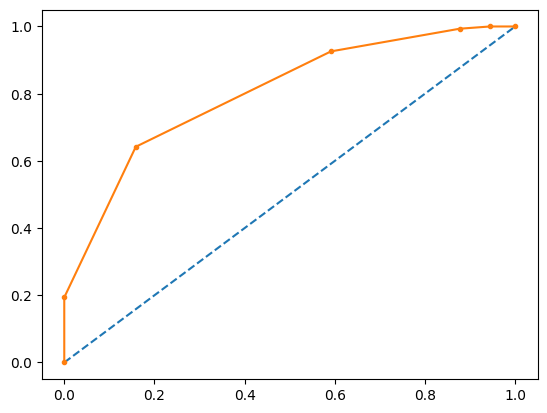

In [20]:
knn = KNeighborsClassifier(n_neighbors = 5)
trained_knn = knn.fit(X_train, y_train)
acc_knn = round(knn.score(X_train, y_train) * 100, 2)
print("Training Accuracy:")
print(acc_knn)
test_knn = knn.fit(X_test, y_test)
acc_test_knn = round(knn.score(X_test, y_test) * 100, 2)
print("Testing Accuracy:")
print(acc_test_knn)
y_pred = knn.predict(X_test)
print("Confusion Matrix:")
print(metrics.confusion_matrix(y_test, y_pred))
print("Classification Matrix:")
print(metrics.classification_report(y_test, y_pred))
cross_val = cross_val_score(KNeighborsClassifier(), X, y, scoring='accuracy', cv=10)
print("Cross Validation value:")
print(cross_val.mean())
y_probs = knn.predict_proba(X_test)[:, 1] # Assuming binary classification; change index if needed
roc = roc_auc_score(y_test.astype(int), y_probs) # Ensure y_test is integer type
print('AUC: %.3f' % roc)
fpr, tpr, thresholds = roc_curve(y_test.astype(int), y_probs) # Ensure y_test is integer type
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()


In [21]:
algorithm = ['K-nearest neighbor', 'Logistic Regression', 'Random Forest']
trainaccuracy = [acc_knn, train_LR_accuracy, train_RF_accuracy]
testaccuracy = [acc_test_knn, test_LR_accuracy, test_RF_accuracy]
index = np.arange(len(algorithm))

fig, ax = plt.subplots()
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, trainaccuracy, bar_width,
                 alpha=opacity,
                 color='b',
                 label='Training Accuracy')

rects2 = plt.bar(index + bar_width, testaccuracy, bar_width,
                 alpha=opacity,
                 color='g',
                 label='Testing Accuracy')

plt.xlabel('Algorithms')
plt.ylabel('Accuracy')
plt.title('Accuracy of algorithms')
plt.xticks(index + bar_width, algorithm)
plt.legend()
plt.tight_layout()
plt.show()


# In[178]:


algorithm = ['K-nearest neighbor', 'Logistic Regression', 'Random Forest']
precision = [precision_KNN, precision_LR, precision_RF]
recall = [recall_KNN, recall_LR, recall_RF]
index = np.arange(len(algorithm))

fig, ax = plt.subplots()
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, trainaccuracy, bar_width,
                 alpha=opacity,
                 color='r',
                 label='Precision')

rects2 = plt.bar(index + bar_width, testaccuracy, bar_width,
                 alpha=opacity,
                 color='y',
                 label='Recall')

plt.xlabel('Algorithms')
plt.ylabel('Units')
plt.title('Precision/Recall of algorithms')
plt.xticks(index + bar_width, algorithm)
plt.legend()
plt.tight_layout()
plt.show()


# In[176]:


crossvalidationaccuracy = [cross_val_knn, cross_val_lr, cross_val_rf]
y_pos = np.arange(len(algorithm))

plt.barh(y_pos, crossvalidationaccuracy, align='center', alpha=0.5)
plt.yticks(y_pos, algorithm)
plt.xlabel('Accuracy')
plt.title('Cross Validation Accuracy of Algorithms')

plt.show()




NameError: name 'train_LR_accuracy' is not defined